## Challenge code
 
 In the code below, you must complete the following functions:
 
 - `three_optimization_steps`: performs three optimization steps. **You must complete this function**.
 - `cost`: this is within the `three_optimization_steps` function. **You must complete this function**. `cost` is a QNode that does a few things:
   + acts on 3 qubits only;
   + embeds the input `data` via [amplitude embedding](https://docs.pennylane.ai/en/stable/code/api/pennylane.AmplitudeEmbedding.html);
   + defines some differentiable gates via a template called [qml.BasicEntanglerLayers](https://docs.pennylane.ai/en/stable/code/api/pennylane.BasicEntanglerLayers.html); and
   + returns the expectation value of $\sum_{i = 1}^n Z_i$, where $n$ is the number of qubits.
 
 Within the `three_optimization_steps` function is a variable called `weights`. These are the changeable parameters that help define the `qml.BasicEntanglerLayers` template that you must put in the `cost` function. `weights` are the parameters that will be optimized (and need to be referred to by this name due to the final call `return cost(weights, data=data)`, which cannot be edited).
 
 To perform three optimization steps, use a gradient decent optimizer — `qml.GradientDescentOptimizer` — with a step size of $0.01$.
 
 Here are some helpful resources:
 
 - [Optimizing a quantum circuit — YouTube video](https://youtu.be/TiQ7T1h8VAQ)
 - [Basic tutorial: qubit rotation — Optimization](https://pennylane.ai/qml/demos/tutorial_qubit_rotation.html#optimization)
 
 ### Input 
 
 As input to this problem, you are given classical `data` (`list(float)`) that you must embed into a quantum circuit via [amplitude embedding](https://docs.pennylane.ai/en/stable/code/api/pennylane.AmplitudeEmbedding.html).
 
 ### Output
 
 This code must output the evaluation of `cost` after three optimization steps have been performed.
 
 If your solution matches the correct one within the given tolerance specified in `check` (in this case it's a `1e-4` relative error tolerance), the output will be `"Correct!"` Otherwise, you will receive a `"Wrong answer"` prompt.
 
 Good luck!
 ### Imports
 The cell below specifies the libraries you should use in this challenge. Run the cell to import the libraries. ***Do not modify the cell.***

In [1]:
import json
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

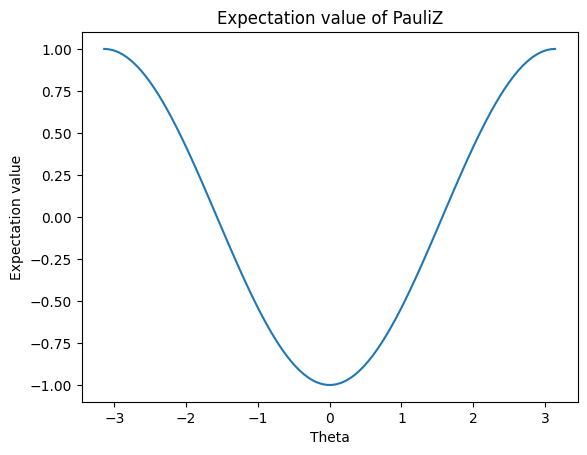

In [2]:
#### SMALL TUTORIAL ON OPTIMZIATION ####
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def circuit(theta):
    qml.PauliX(wires=0)
    qml.RY(theta, wires=0)
    return qml.expval(qml.PauliZ(wires=0))

thetas = np.linspace(-np.pi, np.pi, 100)
exp_vals_Z = []
for theta in thetas:
    exp_vals_Z.append(circuit(theta))
plt.plot(thetas, exp_vals_Z)
plt.title("Expectation value of PauliZ")
plt.xlabel("Theta")
plt.ylabel("Expectation value")
plt.show()

Iteration  0: cost =  0.4161, theta = -1.9091
Iteration 10: cost = -0.5072, theta = -0.9527
Iteration 20: cost = -0.9215, theta = -0.3600
Iteration 30: cost = -0.9901, theta = -0.1269
Iteration 40: cost = -0.9988, theta = -0.0443
Iteration 50: cost = -0.9999, theta = -0.0155
Iteration 60: cost = -1.0000, theta = -0.0054
Iteration 70: cost = -1.0000, theta = -0.0019
Iteration 80: cost = -1.0000, theta = -0.0007
Iteration 90: cost = -1.0000, theta = -0.0002


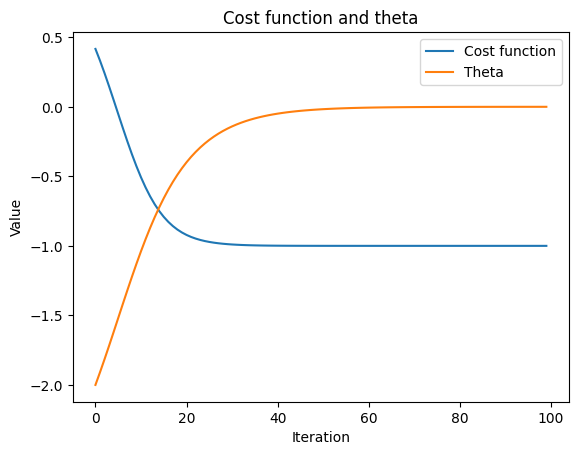

In [3]:
theta = np.array([-2.0], requires_grad=True)
opt = qml.GradientDescentOptimizer(stepsize=0.1)
n_iter = 100
theta_list = []
cost_list = []
for it in range(n_iter):
    theta_list.append(theta[0])
    theta, cost = opt.step_and_cost(lambda x: circuit(x), theta)
    cost_list.append(cost)
    if it % 10 == 0:
        print(f"Iteration {it:2d}: cost = {cost[0]:>7.4f}, theta = {theta[0]:.4f}")

plt.plot(np.arange(n_iter), cost_list, label="Cost function")
plt.plot(np.arange(n_iter), theta_list, label="Theta")
plt.legend()
plt.title("Cost function and theta")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.show()

### Code
 Complete the code below. Note that during QHack, some sections were not editable. We've marked those sections accordingly here, but you can still edit them if you wish.

In [4]:
# Uneditable section #

def three_optimization_steps(data):
    """Performs three optimization steps on a quantum machine learning model.

    Args:
        data (list(float)): Classical data that is to be embedded in a quantum circuit.

    Returns:
        (float): The cost function evaluated after three optimization steps.
    """

    norm = np.sqrt(np.sum(data[i] ** 2 for i in range(len(data))))
    data /= norm

    dev = qml.device("default.qubit", wires=3)

    @qml.qnode(dev)
    def cost(weights, data=data):
        """A circuit that embeds classical data and has quantum gates with tunable parameters/weights.

        Args:
            weights (numpy.array): An array of tunable parameters that help define the gates needed.

        Kwargs:
            data (list(float)): Classical data that is to be embedded in a quantum circuit.

        Returns:
            (float): The expectation value of the sum of the Pauli Z operator on every qubit.
        """
        # End of uneditable section #

        # Put your code here #
        wires = dev.wires
        # Encodes 2^n features into the amplitude vector of n qubits
        qml.AmplitudeEmbedding(data, wires=wires)
        qml.BasicEntanglerLayers(weights, wires=wires)
        Zs = [qml.PauliZ(wires=wire) for wire in wires]
        coeff = [1 for _ in wires]
        return qml.expval(qml.Hamiltonian(coeff, Zs))

        # another option could be:
        # return qml.expval(qml.sum(*[qml.PauliZ(wires=i) for i in range(n_qubits)]))
    
    # Uneditable section #

    # initialize the weights
    # this is going to reshape a 1D array of weights into a 2D array, of the good shape
    # (6) -> (2, 3) (2 layers, 3 wires)
    shape = qml.BasicEntanglerLayers.shape(n_layers=2, n_wires=len(dev.wires))
    weights = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6], requires_grad=True).reshape(
        shape
    )

    # End of uneditable section #

    # Put your code here #

    # Define a gradient descent optimizer with a step size of 0.01
    opt = qml.GradientDescentOptimizer(stepsize=0.01)
    # Optimize the cost function for three steps
    for _ in range(3):
        weights, prev_cost = opt.step_and_cost(cost, weights)
    
    # Uneditable section #
    return cost(weights, data=data)

These functions are responsible for testing the solution. You will need to run the cell below. ***Do not modify the cell.***

In [5]:
def run(test_case_input: str) -> str:
    data = json.loads(test_case_input)
    cost_val = three_optimization_steps(data)
    return str(cost_val)

def check(solution_output: str, expected_output: str) -> None:
    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(solution_output, expected_output, rtol=1e-4)

### Test cases
 Running the cell below will load the test cases. ***Do not modify the cell***.
 - input: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
 	+ expected output: 0.066040
 - input: [3.1, 1.2, 5.3, 4.4, 9.5, 7.6, 8.7, 2.8]
 	+ expected output: 0.0153514

In [6]:
test_cases = [['[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]', '0.066040'], ['[3.1, 1.2, 5.3, 4.4, 9.5, 7.6, 8.7, 2.8]', '0.0153514']]

### Solution testing
 Once you have run every cell above, including the one with your code, the cell below will test your solution. Run the cell. If you are correct for all of the test cases, it means your solutions is correct. Otherwise, you need to double check your work. ***Do not modify the cell below.***

In [7]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]'...
Correct!
Running test case 1 with input '[3.1, 1.2, 5.3, 4.4, 9.5, 7.6, 8.7, 2.8]'...
Correct!
